In [1]:
# Importamos el CSV
import pandas as pd

X = pd.read_csv('CC GENERAL.csv')

In [2]:
# Visualizamos las primeras filas
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Vemos sus dimensiones
X.shape

(8950, 18)

In [4]:
# Vemos sus tipos de datos
X.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
# Quito CUST_ID
X.drop(['CUST_ID'], axis=1, inplace=True)

In [6]:
# Vemos los valores nulos
X.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Vemos los valores CREDIT_LIMIT
X['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [8]:
# Lo reemplazo por la media
X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
# Vemos los valores de MINIMUM_PAYMENTS
X['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [10]:
# Lo reemplazo por el valor más frecuente
X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].mode()[0], inplace=True)

In [11]:
# Vemos los valores vacíos
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

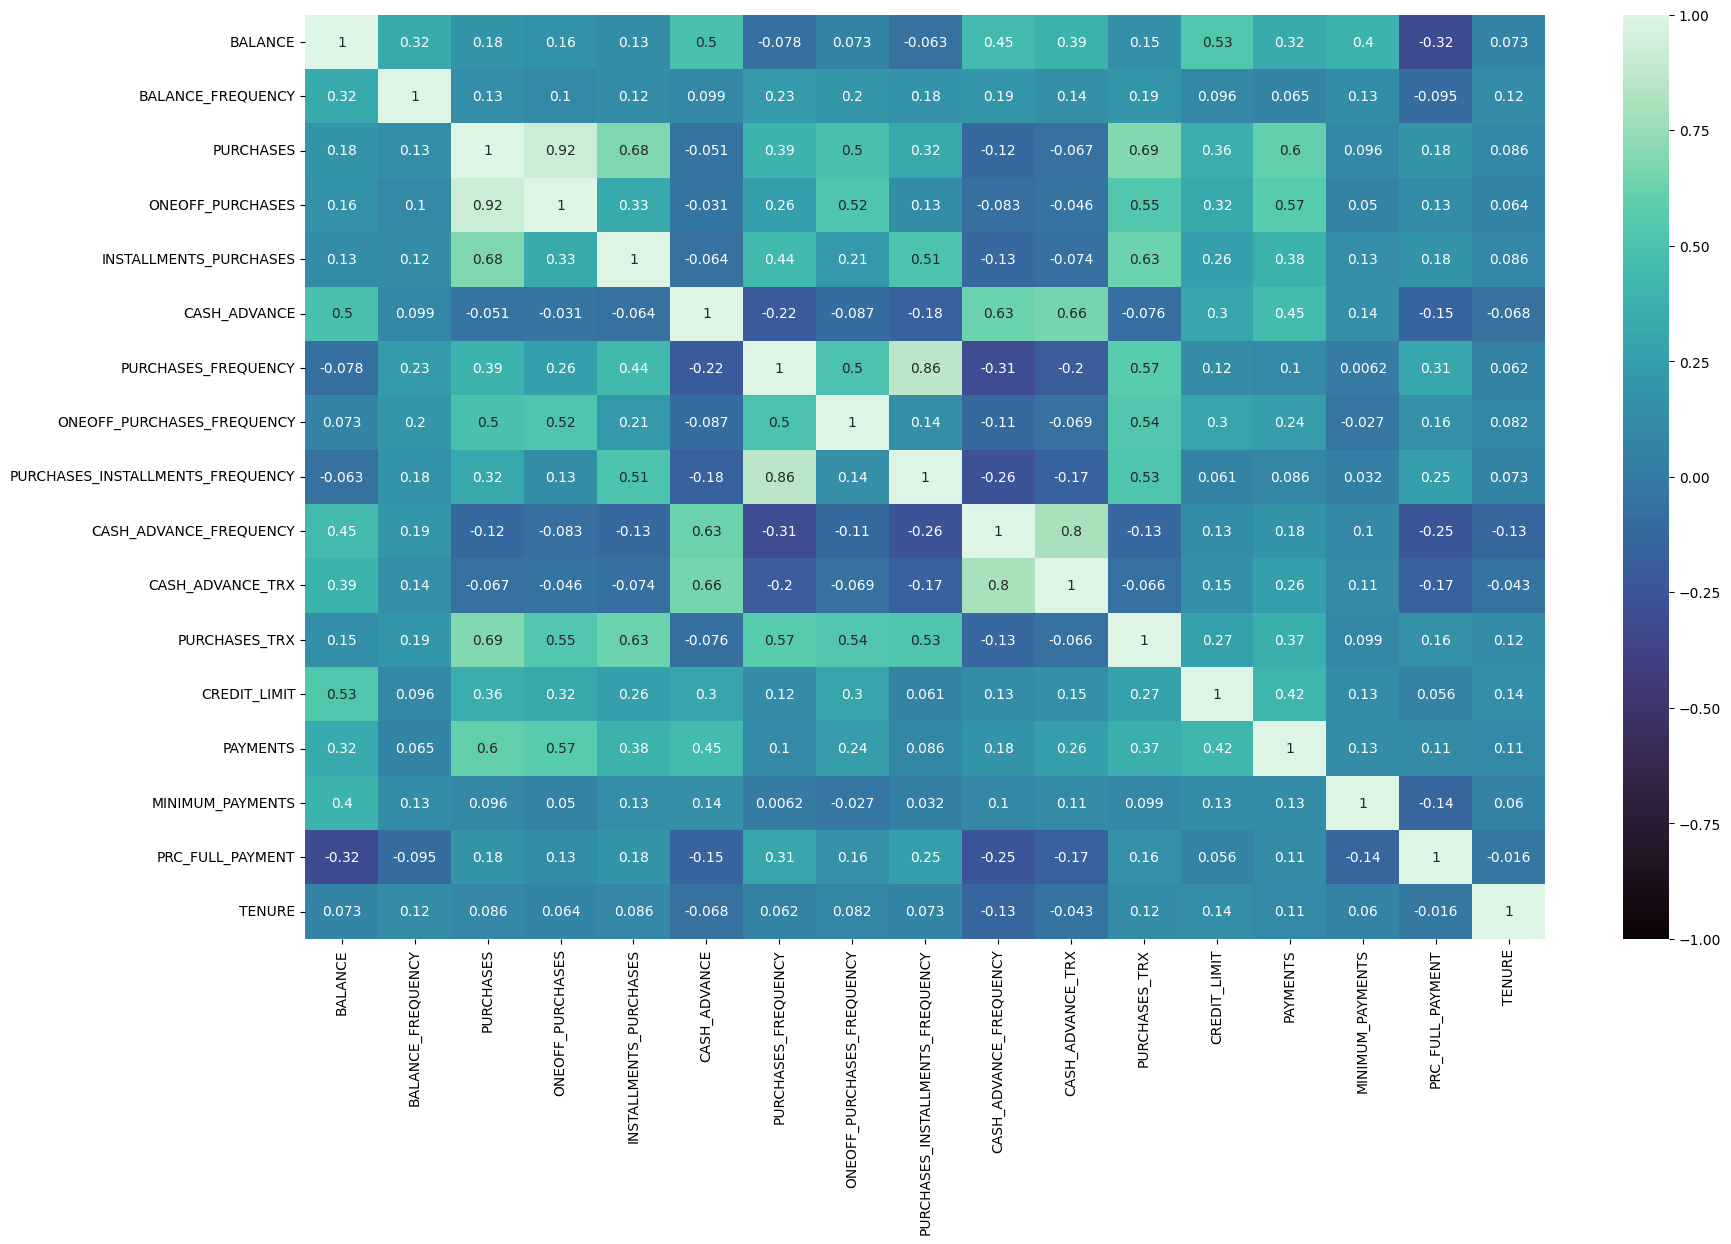

In [12]:
# Hacemos un mapa de calor para ver la correlación de los datos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap= 'mako')

In [14]:
# Veo los tipos de datos
X.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [13]:
# Escalado de datos
from sklearn.preprocessing import Normalizer

nr = Normalizer()
credit_card_normalized = nr.fit_transform(X)
credit_card_normalized.var()

0.047222850630439725

# K-Means

In [24]:
from sklearn.cluster import KMeans

credit_card_kmeans = KMeans(n_clusters=4, random_state=0, n_init=1)
credit_card_kmeans = credit_card_kmeans.fit(credit_card_normalized)
credit_card_kmeans.labels_


array([2, 0, 2, ..., 2, 2, 3], dtype=int32)

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)
kmeans.fit(credit_card_normalized)


Initialization complete
Iteration 0, inertia 2169.7033463192674.
Iteration 1, inertia 1764.986765099681.
Iteration 2, inertia 1757.9229769848857.
Iteration 3, inertia 1753.345673143405.
Iteration 4, inertia 1749.155268775143.
Iteration 5, inertia 1747.541428506996.
Iteration 6, inertia 1746.8356826203594.
Iteration 7, inertia 1746.5049065164983.
Iteration 8, inertia 1746.3139466756052.
Iteration 9, inertia 1746.1839231720771.
Iteration 10, inertia 1746.1213547138423.
Iteration 11, inertia 1746.0890750575113.
Iteration 12, inertia 1746.0653245220315.
Iteration 13, inertia 1746.0557100151364.
Converged at iteration 13: center shift 5.73802734697142e-07 within tolerance 1.459797962988614e-06.
Initialization complete
Iteration 0, inertia 2724.128156201369.
Iteration 1, inertia 1661.8221604019832.
Iteration 2, inertia 1629.7444504434225.
Iteration 3, inertia 1622.080627422782.
Iteration 4, inertia 1620.2404148584344.
Iteration 5, inertia 1619.7436030333986.
Iteration 6, inertia 1619.6557268

KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)

In [26]:
# Dentro de inertia tenemos la suma de los errores al cuadrado
kmeans.inertia_

1619.6314505345033

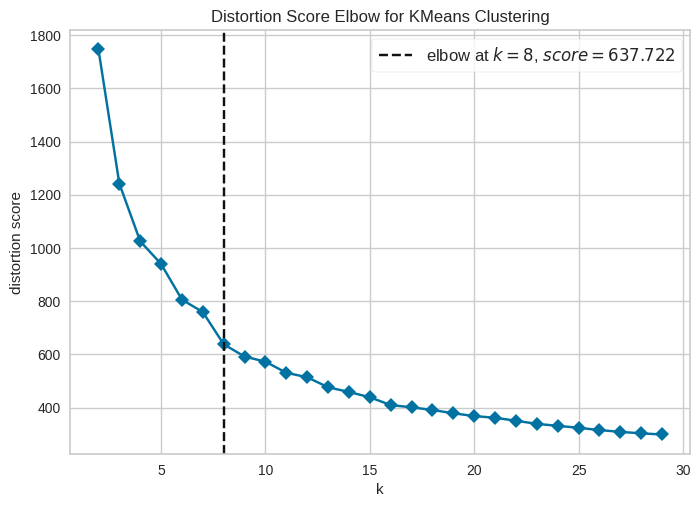

In [27]:
# Usamos el algoritmo del codo para obtener los clusters

from yellowbrick.cluster import KElbowVisualizer
credit_card_visualizer = KElbowVisualizer(credit_card_kmeans, k=(2,30), timings=False)

credit_card_visualizer.fit(credit_card_normalized)
credit_card_visualizer.show()
plt.show()

In [28]:
# Uso de bic
import numpy as np

def BIC(K, grupos, credit_card_normalized):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = credit_card_normalized.shape[0] # Número de datos
  P = credit_card_normalized.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(credit_card_normalized[:, j]))
      sigma_j = np.square(np.std(credit_card_normalized[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

In [35]:
## Calcular el BIC del modelo K-means anterior
kmeans = KMeans(n_clusters=2, n_init=10, random_state=100)
grupos = kmeans.fit_predict(credit_card_normalized)

result_bic = BIC(2, grupos, credit_card_normalized)
print(result_bic)

-1464173.1129575204


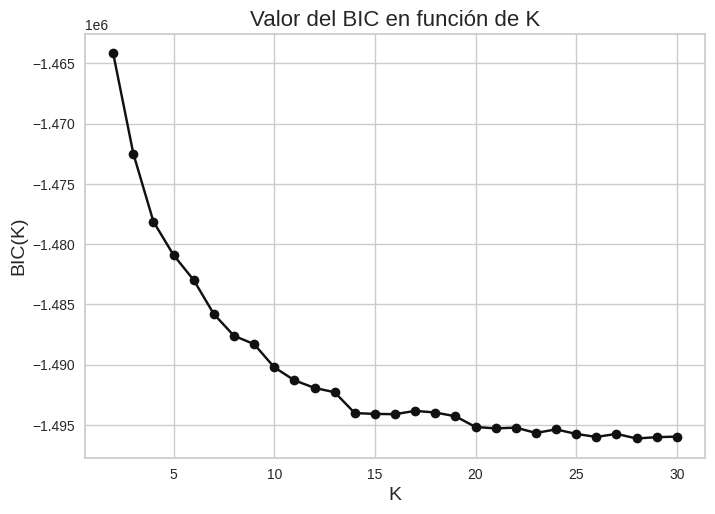

In [37]:
## Calculo del BIC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Kmax = 30

BIC_array = []

for k in range(2, Kmax+1):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100)
  grupos = kmeans.fit_predict(credit_card_normalized)
  BIC_array.append(BIC(k, grupos, credit_card_normalized))

# Dibujamos el BIC obtenido para cada valor de k
plt.plot(np.arange(2, Kmax+1), BIC_array, "ko-")
plt.title("Valor del BIC en función de K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.show()

In [43]:
## Dibujamos la solución con K = 13
K = 13
kmeans = KMeans(n_clusters=K, random_state=10)
pred = kmeans.fit_predict(credit_card_normalized)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/Agrupación de tarjetas de credito/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


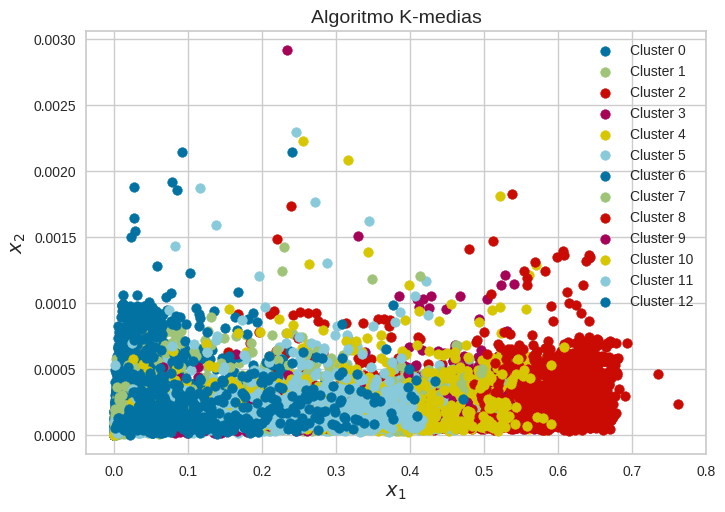

In [44]:
# Representación gráfica de la solución
for k in range(0, K):
  plt.scatter(credit_card_normalized[pred==k, 0], credit_card_normalized[pred==k, 1], label="Cluster {}".format(k)) 

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

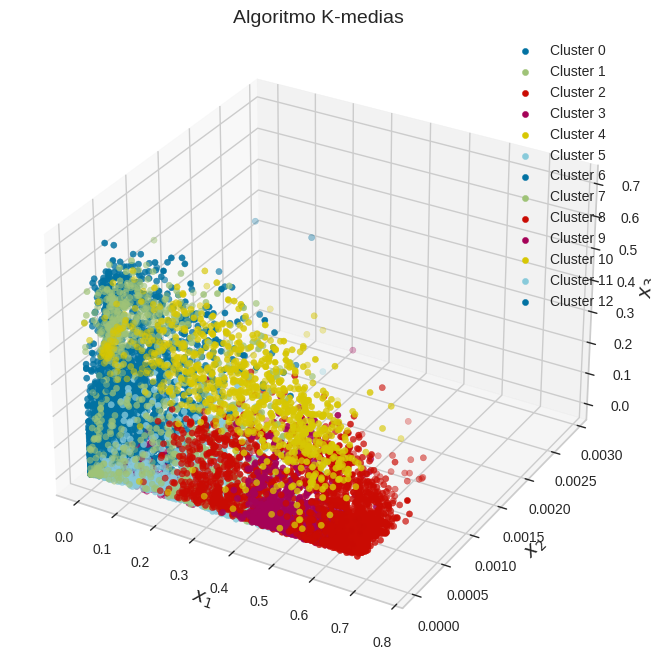

In [45]:
# Representación gráfica de la solución en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for k in range(0, K):
    ax.scatter(credit_card_normalized[pred==k, 0], credit_card_normalized[pred==k, 1], credit_card_normalized[pred==k, 2], label="Cluster {}".format(k))

ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.set_zlabel(r"$x_3$", fontsize=14)
ax.set_title("Algoritmo K-medias", fontsize=14)
ax.legend()
plt.show()

In [40]:
## Dibujamos la solución con K = 8 (usando codo)
K = 8
kmeans = KMeans(n_clusters=K, random_state=10)
pred = kmeans.fit_predict(credit_card_normalized)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/Agrupación de tarjetas de credito/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


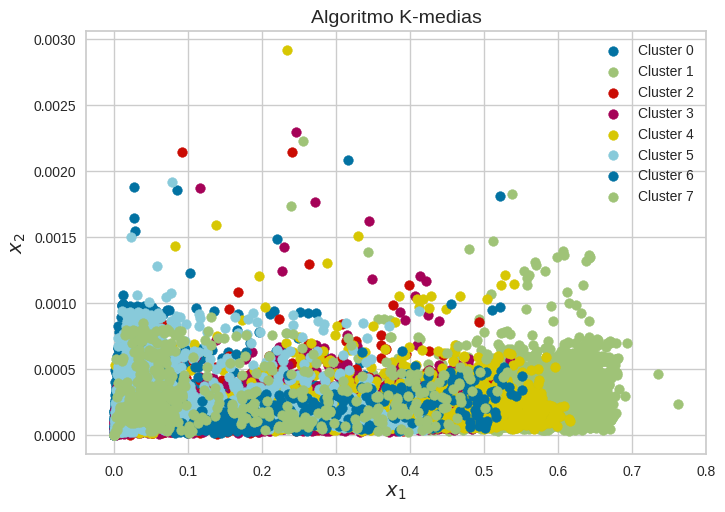

In [41]:
## Representación gráfica de la solución
for k in range(0, K):
  plt.scatter(credit_card_normalized[pred==k, 0], credit_card_normalized[pred==k, 1], label="Cluster {}".format(k)) 

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

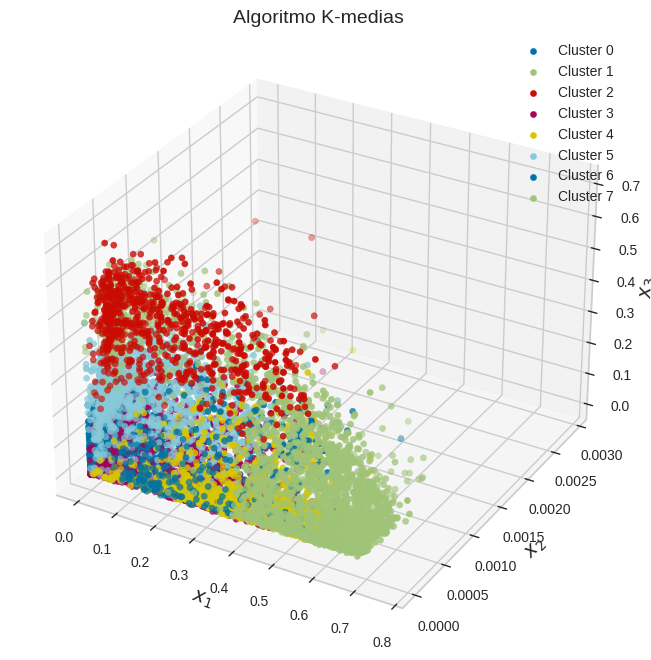

In [42]:
# Representación gráfica de la solución en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for k in range(0, K):
    ax.scatter(credit_card_normalized[pred==k, 0], credit_card_normalized[pred==k, 1], credit_card_normalized[pred==k, 2], label="Cluster {}".format(k))

ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.set_zlabel(r"$x_3$", fontsize=14)
ax.set_title("Algoritmo K-medias", fontsize=14)
ax.legend()
plt.show()

# Fuzzy C-Means

In [25]:
# Realizamos la instalación del paquete skfuzzy de la librería scikit, el cual
# usaremos para ejecutar el algoritmo fuzzy C-means.
!pip3 install scikit-fuzzy

In [66]:
from skfuzzy.cluster import cmeans

K = 4 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

cntr, u, u0, d, jm, p, fpc = cmeans(credit_card_normalized.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - cntr: Centroides
# - u: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración
# - jm: Historico del valor de la función objetivo
# - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

In [67]:
# Como solo estamos interesados en los centroides y la matriz de pertenencia
# podemos descartar el resto de valores de salida:
centroides, U, _, _, _, _, _ = cmeans(credit_card_normalized.T, K, m, tolerancia, maxiter, seed=100)


In [68]:
# Mostramos la matriz de pertenencia
with np.printoptions(threshold=False):
    print(U)

[[0.02901714 0.7677494  0.10977064 ... 0.0263929  0.05383241 0.17727614]
 [0.89757613 0.06011265 0.52001346 ... 0.90422743 0.83425779 0.21691577]
 [0.03896947 0.06494341 0.11865481 ... 0.03722426 0.05064022 0.41208074]
 [0.03443726 0.10719455 0.2515611  ... 0.03215542 0.06126958 0.19372735]]


In [74]:
# Obtener a que grupo pertenece cada observación
grupos = np.nanargmax(U, axis=0) # Devuelve los índices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

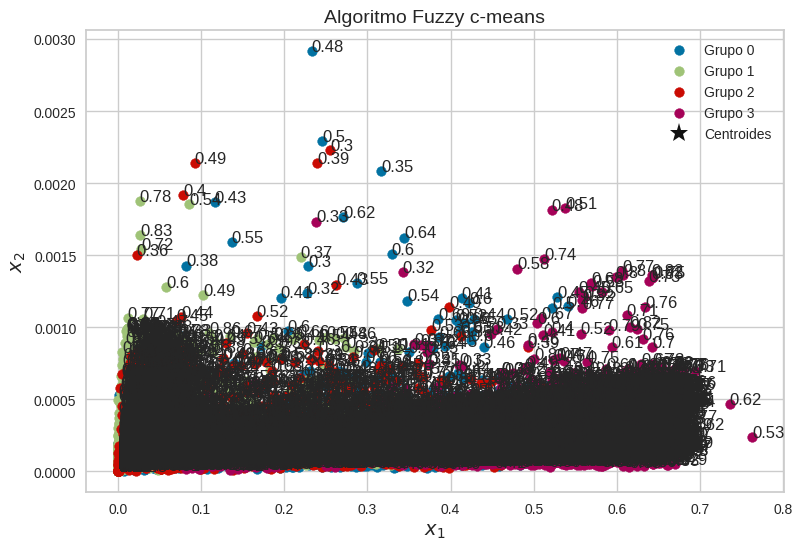

In [75]:
## Representación gráfica de la solución
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Representar las observaciones asociadas con cada grupo (cluster)
for k in range(0, K):
  plt.scatter(credit_card_normalized[grupos==k, 0], credit_card_normalized[grupos==k, 1], label="Grupo {}".format(k)) 

# Representar junto a cada observación el grado de pertenencia al grupo
for i, maxU_i in enumerate(np.round(maxU, 2)):
  plt.annotate(maxU_i, (credit_card_normalized[i,0], credit_card_normalized[i,1]))

plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides") # Dibujamos los centroides

plt.title("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

[[5.28758771e-01 2.90774827e-04 7.16819161e-02 3.93734202e-02
  3.23581828e-02 1.44872962e-01 7.43917432e-05 2.72692503e-05
  5.13047256e-05 4.78229249e-05 8.70402231e-04 1.53684248e-03
  7.01758127e-01 2.00882599e-01 2.10803644e-01 3.95677960e-06
  3.47316947e-03]
 [3.11056431e-01 2.33197290e-04 7.68220433e-02 4.12273719e-02
  3.56380826e-02 4.15912447e-01 6.50030990e-05 2.25177940e-05
  4.59130804e-05 6.77630495e-05 1.59038133e-03 1.39342335e-03
  6.11697025e-01 3.62785278e-01 1.45281683e-01 1.63758474e-05
  2.93449349e-03]
 [5.52840707e-02 2.24450333e-04 1.08073476e-01 4.11429436e-02
  6.70126666e-02 2.13304078e-02 1.70873104e-04 3.07432821e-05
  1.39479907e-04 6.69879615e-06 1.12824390e-04 2.71544620e-03
  9.46466005e-01 1.36310302e-01 5.61453661e-02 8.04528765e-05
  3.48856481e-03]
 [1.60947902e-01 2.36148467e-04 3.66076085e-01 2.10641754e-01
  1.55566288e-01 5.36557187e-02 1.85295098e-04 7.81947338e-05
  1.39841984e-04 1.34904151e-05 2.70577068e-04 5.46013537e-03
  6.27951051e-01

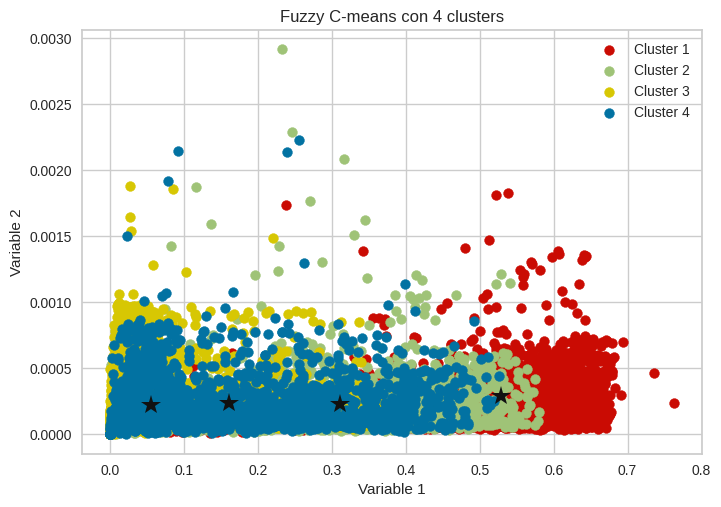

In [65]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Definir los colores para cada cluster
colores = ['r', 'g', 'y', 'b']

# Aplicar Fuzzy C-means
n_clusters = 4
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(credit_card_normalized.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Obtener los clústeres a los que pertenece cada punto
clusters = np.argmax(u, axis=0)

# Imprimir los centroides de los clústeres
print(cntr)

# Visualizar los datos
for i in range(n_clusters):
    plt.scatter(credit_card_normalized[clusters==i, 0], credit_card_normalized[clusters==i, 1], c=colores[i], s=50, label="Cluster {}".format(i+1))
    plt.plot(cntr[i][0], cntr[i][1], '*', markersize=15, color='k')

plt.title("Fuzzy C-means con {} clusters".format(n_clusters))
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.legend()
plt.show()



# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
import numpy

minPts = 3
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(credit_card_normalized)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 1


In [33]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels

array([0, 0, 0, ..., 0, 0, 0])

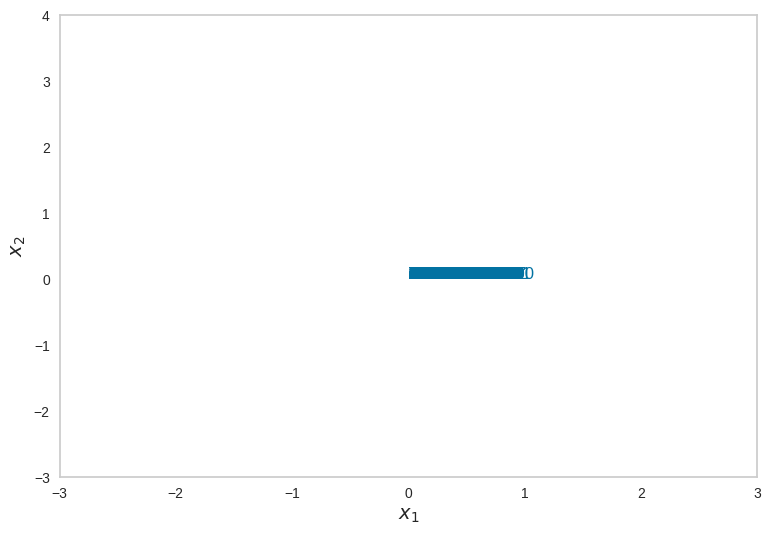

In [34]:
# Representación gráfica de la solución
import numpy

colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(credit_card_normalized)):
    plt.text(credit_card_normalized[i][0], credit_card_normalized[i][1], i, color=colors[labels[i]]) 
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.show()

In [35]:
from sklearn.cluster import DBSCAN

# Creamos el objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Entrenamos el modelo
dbscan.fit(credit_card_normalized)

# Obtenemos las etiquetas de los clusters
labels = dbscan.labels_

# Imprimimos el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"El número de clusters encontrados es: {n_clusters}")

El número de clusters encontrados es: 1


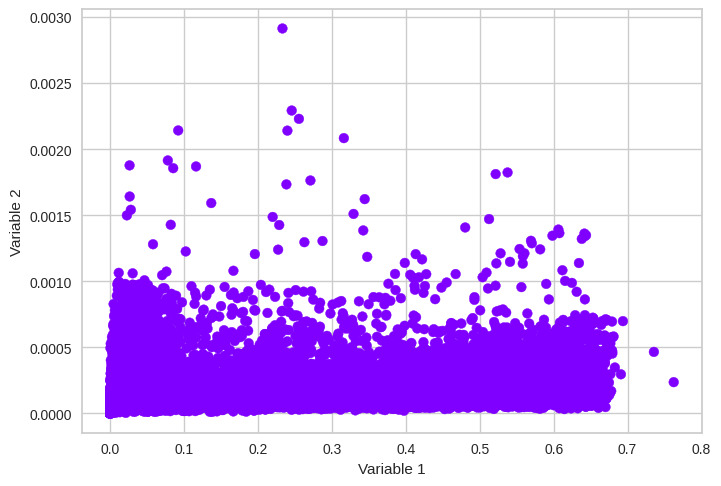

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(credit_card_normalized)

# Crear gráfico de dispersión
plt.scatter(credit_card_normalized[:,0], credit_card_normalized[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

Número de clusters encontrados: 1


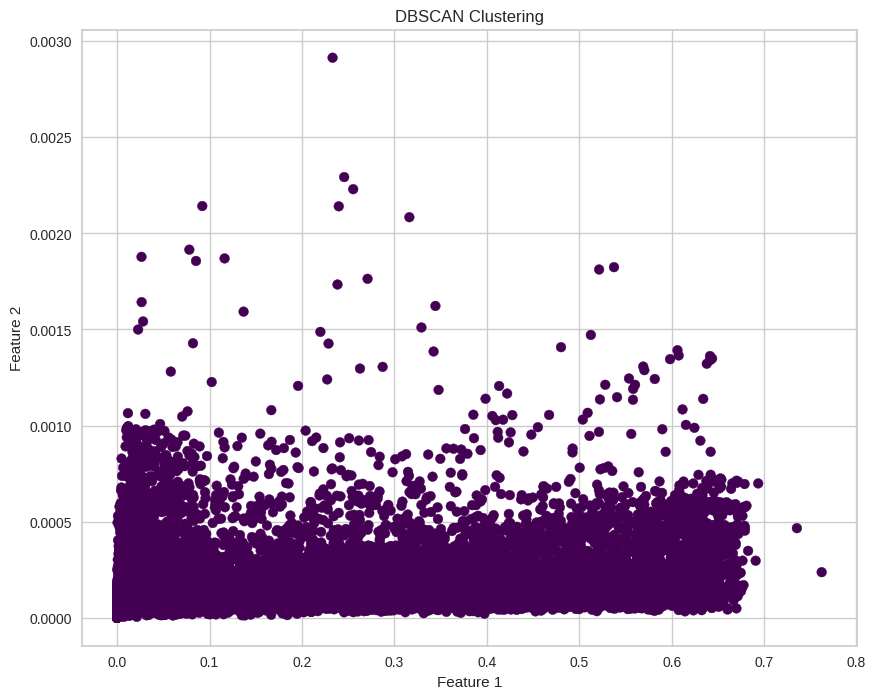

In [83]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Entrenar el modelo
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(credit_card_normalized)

# Obtener los clusters encontrados
labels = dbscan.labels_

# Contar el número de clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Número de clusters encontrados:", n_clusters)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(credit_card_normalized[:, 0], credit_card_normalized[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Algoritmos Jerárquicos

In [38]:
# Escalamos del 0 al 1
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [39]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_) 

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=X.columns)

[0.49597073 0.1405405 ]


,PC-1,PC-2
BALANCE,-0.015029,0.098814
BALANCE_FREQUENCY,0.101778,0.266295
PURCHASES,0.032821,0.047629
ONEOFF_PURCHASES,0.019989,0.058497
INSTALLMENTS_PURCHASES,0.035333,-0.002199
CASH_ADVANCE,-0.016895,0.013364
PURCHASES_FREQUENCY,0.685501,0.080520
ONEOFF_PURCHASES_FREQUENCY,0.242632,0.822762
PURCHASES_INSTALLMENTS_FREQUENCY,0.637190,-0.423198
CASH_ADVANCE_FREQUENCY,-0.074094,0.055926


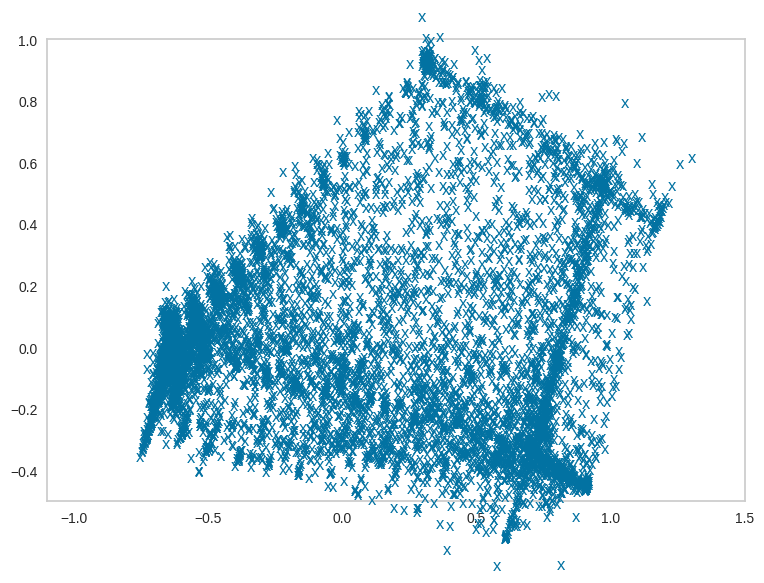

In [40]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")  
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()

In [53]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(X_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma	
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=15)
plt.show()
# Para más información consultar:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/Agrupación de tarjetas de credito/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


Distancia Media	 6947.47


/tmp/ipykernel_131196/1140215775.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [73.75, 73.75, 113.75, 113.75],
  [55.0, 55.0, 93.75, 93.75],
  [21.25, 21.25, 74.375, 74.375],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [165.0, 165.0, 191.875, 191.875],
  [150.0, 150.0, 178.4375, 178.4375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [330.0, 33

Error in callback <function flush_figures at 0x7fd9188b69e0> (for post_execute):


KeyboardInterrupt: 

In [60]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 8950


array([3379, 8210, 7051, ..., 3449, 2833, 3072], dtype=int32)

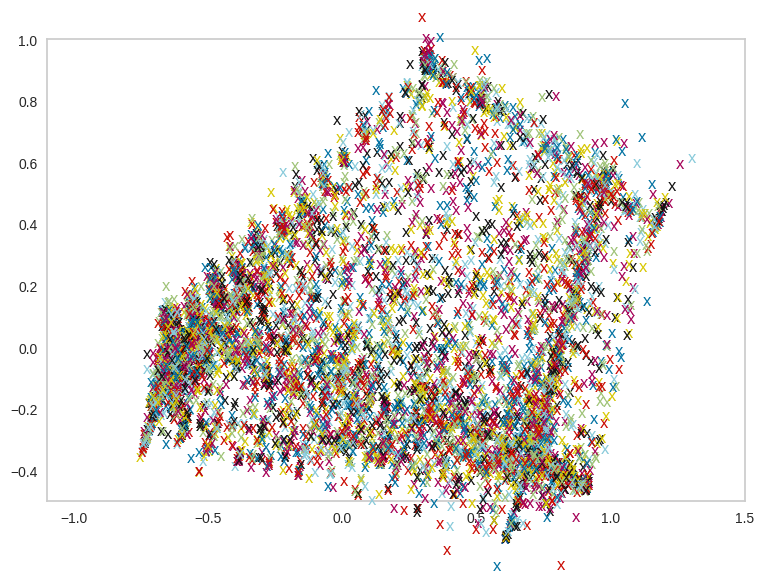

In [61]:
# Modifico el original y pongo comentadas las líneas a mejorar
colores = 'bgrcmyk'
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i] % len(colores)])
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()

# DPC

In [62]:
# Realizamos la instalación del paquete pydpc, el cual usaremos para ejecutar
# el algoritmo DPC. Más información en: https://pypi.org/project/pydpc/
!pip3 install pydpc

In [63]:
X_scaled = np.ascontiguousarray(X)

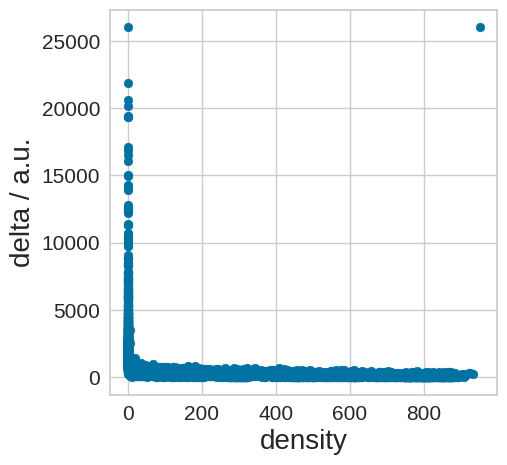

In [64]:
import pydpc

# Primero inicializamos el algoritmo, lo que calcula las densidades y la 
# distancia mínima entre puntos. Este método también dibuja el grafo de decisión.
clu = pydpc.Cluster(X_scaled)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

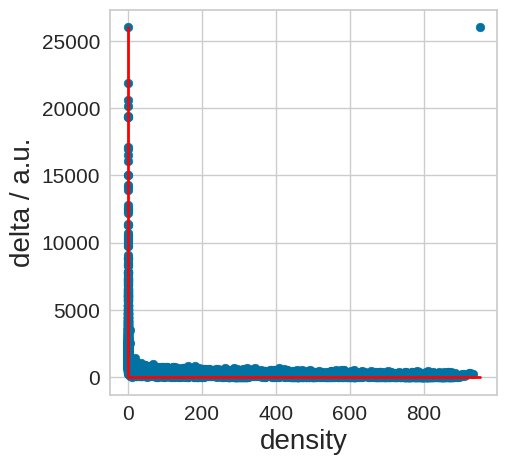

In [66]:
# Definimos los valores rho y delta que nos permiten elegir los centros
rho = bool(1)
delta = bool(1.5)
clu.assign(rho, delta)


In [67]:
# Obtenemos que datos de X serán los centros de los clusters
cluster_centers = clu.clusters
cluster_centers

array([   0,    2,    3, ..., 8947, 8948, 8949], dtype=int32)

In [50]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels = clu.membership
labels

array([   0, 4195,    1, ..., 7512, 7513, 7514], dtype=int32)

In [51]:
# Representación gráfica de la solución
import numpy

colors = 'bgk'
while len(colors) < max(labels) + 1:
    colors += colors

plt.figure(figsize=(9, 6))
for i in range(len(X_scaled)):
    if i in cluster_centers:
        plt.text(X_scaled[i][0], X_scaled[i][1], i, color=colors[labels[i]], weight='bold', fontsize=16)
    else:
        plt.text(X_scaled[i][0], X_scaled[i][1], i, color=colors[labels[i]])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.savefig('DPC.png')




ValueError: Image size of 2214210x535 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

AttributeError: 'Cluster' object has no attribute 'process'

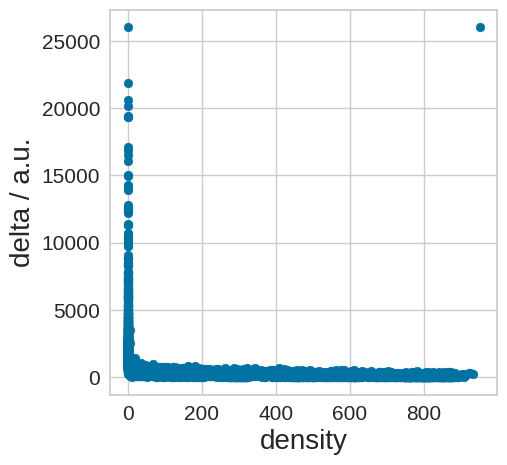

In [52]:
import numpy as np
import pydpc
import matplotlib.pyplot as plt


# Inicializar el algoritmo DPC
clu = pydpc.Cluster(X_scaled)

# Calcular las densidades y la distancia mínima entre puntos
clu.process()

# Asignar las muestras a sus correspondientes clusters
labels = clu.get_labels()

# Encontrar los centros de los clusters
cluster_centers = clu.get_centers()

# Reducir la dimensionalidad a dos dimensiones para poder visualizar los clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Representación gráfica de los clusters encontrados por DPC
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    if i in cluster_centers: # Centros de los clusters (en negrita)
        plt.text(X_pca[i][0], X_pca[i][1], i, color=colors[labels[i]], weight='bold', fontsize=16)
    else: # Resto de datos
        plt.text(X_pca[i][0], X_pca[i][1], i, color=colors[labels[i]]) 
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)  
plt.grid()
plt.show()